In [1]:
# !pip install matplotlib
# !pip install scipy
# pip install seaborn

In [1]:
import pymysql.cursors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import connect_to_db as cn

In [37]:
# cdf plotting을 하기 위한 function.
def draw_cdf(np_result, n_bins, label, title, color):
    np_result = np.array(np_result, dtype=float)
    filename = title + '.png'

    plt.rcParams["figure.figsize"] = [15, 10]
    plt.rcParams["figure.autolayout"] = True

    count, bins_count = np.histogram(np_result, bins=n_bins)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    plt.plot(bins_count[1:], cdf, label="CDF", color=color)
    plt.xlabel(label, fontsize=12)
    plt.title(title, fontsize=18)
    plt.xscale('symlog')
    plt.savefig(filename, dpi=300)
    plt.show()

In [3]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursor1 = connection.cursor(pymysql.cursors.DictCursor)
cursor2 = connection.cursor(pymysql.cursors.DictCursor)
cursor3 = connection.cursor(pymysql.cursors.DictCursor)

sql1 = 'select * from mentor;'
cursor1.execute(sql1)

sql2 = 'select * from mentor where comment_cnt < 10000;'
cursor2.execute(sql2)

sql3 = "select * from mentor where author not in ('greatyellowshark', 'gurneyhallack', 'aristapop', 'Pi25', 'SeriousSamStone', 'Umbresp', 'CUTIEJUDY', 'Imissmemom', 'aagee', 'noonches', 'Vientodecara', 'Jolojil', 'sciential84', 'AmazonPriceBot', 'AmputatorBot', 'AntiObnoxiousBot', 'ClickableLinkBot', 'converter-bot', 'CoolDownBot', 'FakespotAnalysisBot', 'HappyCakeBot', 'hotlinehelpbot', 'lerobinbot', 'LimbRetrieval-Bot', 'LinkifyBot', 'NoGoogleAMPBot', 'oofed-bot', 'PORTMANTEAU-BOT', 'Reddit-Book-Bot', 'remindditbot', 'RemindMeBot', 'RepostSleuthBot', 'RossGellerBot', 'sneakpeekbot', 'the_timezone_bot', 'timee_bot', 'tiny_smile_bot', 'TitleLinkHelperBot', 'wikipedia_answer_bot', ' wikipedia_text_bot', 'WikiTextBot', 'YoMommaJokeBot', '', 'AutoModerator');"
cursor3.execute(sql3)

# result가 dict 형태로 return.
result1 = cursor1.fetchall()
result2 = cursor2.fetchall()
result3 = cursor3.fetchall()
connection.close()

In [4]:
result1_df = pd.DataFrame(result1)
result1_df

,author,comment_cnt,mentee_cnt,average_is_score,average_es_score
0,,428466,125841,1.35895,1.82950
1,_________________UWU,2,2,1.50000,2.00000
2,______________Blank,2,1,2.00000,1.50000
3,_________-----------,4,1,2.00000,1.00000
4,_________ez_________,1,1,1.00000,2.00000
...,...,...,...,...,...
595460,zzzzzsleepyzzzzz,3,2,1.33333,2.00000
595461,zzzzzzarah,1,1,1.00000,3.00000
595462,zzzzzzz____,3,3,1.00000,2.00000
595463,zzzzzzzzzra,1,1,1.00000,3.00000


In [5]:
result2_df = pd.DataFrame(result2)
result2_df

,author,comment_cnt,mentee_cnt,average_is_score,average_es_score
0,_________________UWU,2,2,1.50000,2.00000
1,______________Blank,2,1,2.00000,1.50000
2,_________-----------,4,1,2.00000,1.00000
3,_________ez_________,1,1,1.00000,2.00000
4,_______Anon______,1,1,1.00000,2.00000
...,...,...,...,...,...
595458,zzzzzsleepyzzzzz,3,2,1.33333,2.00000
595459,zzzzzzarah,1,1,1.00000,3.00000
595460,zzzzzzz____,3,3,1.00000,2.00000
595461,zzzzzzzzzra,1,1,1.00000,3.00000


In [6]:
result3_df = pd.DataFrame(result3)
result3_df

,author,comment_cnt,mentee_cnt,average_is_score,average_es_score
0,_________________UWU,2,2,1.50000,2.00000
1,______________Blank,2,1,2.00000,1.50000
2,_________-----------,4,1,2.00000,1.00000
3,_________ez_________,1,1,1.00000,2.00000
4,_______Anon______,1,1,1.00000,2.00000
...,...,...,...,...,...
595417,zzzzzsleepyzzzzz,3,2,1.33333,2.00000
595418,zzzzzzarah,1,1,1.00000,3.00000
595419,zzzzzzz____,3,3,1.00000,2.00000
595420,zzzzzzzzzra,1,1,1.00000,3.00000


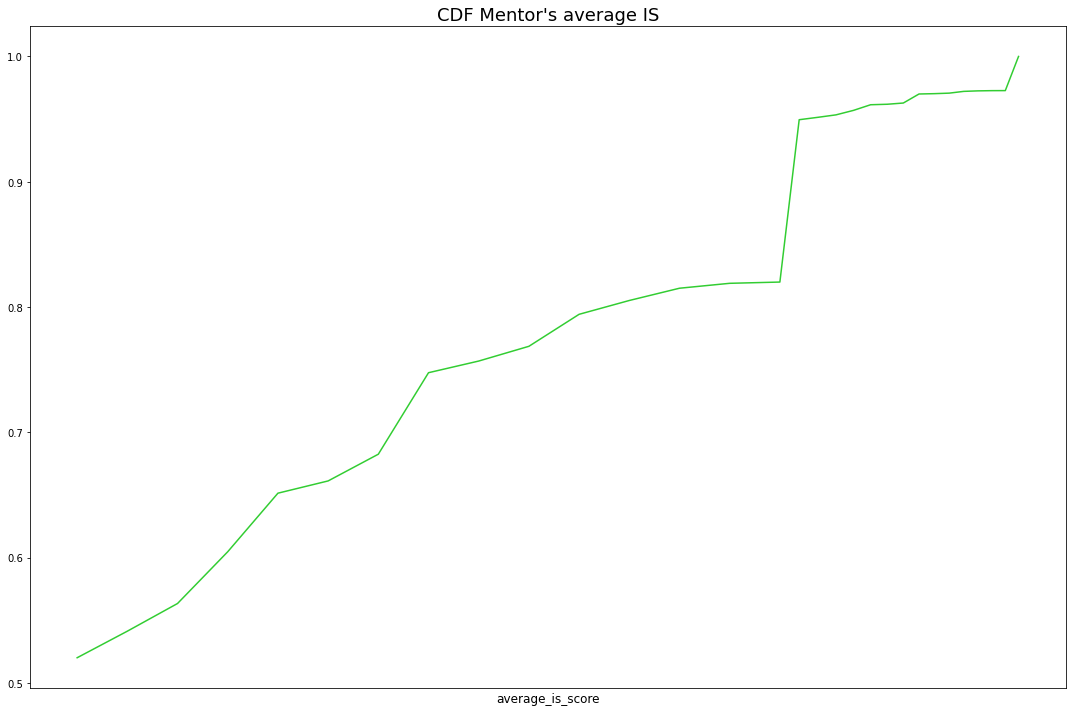

In [38]:
np_result1 = np.array(result1_df['average_is_score'].tolist())
draw_cdf(np_result1, 30, 'average_is_score', "CDF Mentor\'s average IS", 'limegreen')

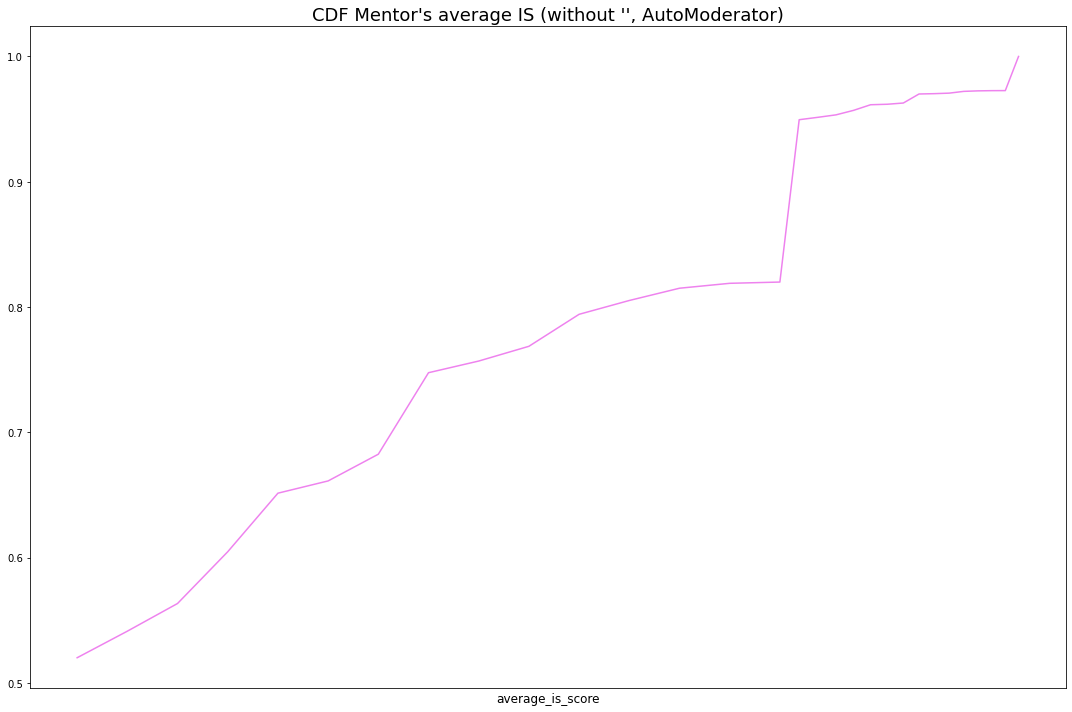

In [39]:
np_result2 = np.array(result2_df['average_is_score'].tolist())
draw_cdf(np_result2, 30, 'average_is_score', "CDF Mentor's average IS (without '', AutoModerator)", 'violet')

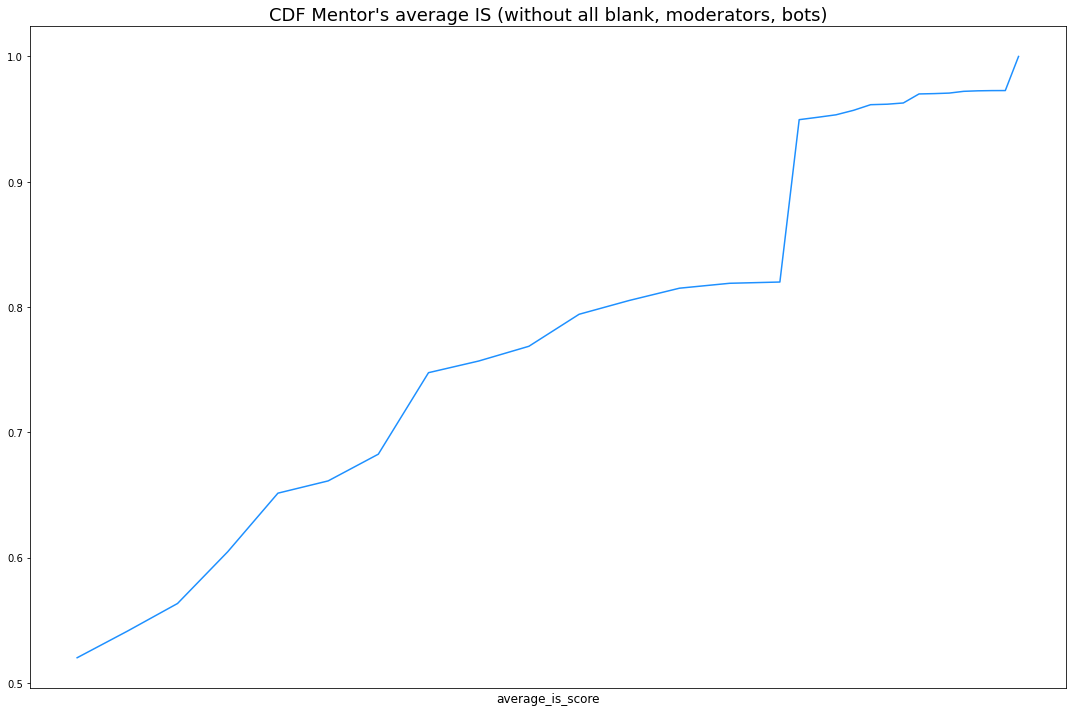

In [40]:
np_result3 = np.array(result3_df['average_is_score'].tolist())
draw_cdf(np_result3, 30, 'average_is_score', "CDF Mentor's average IS (without all blank, moderators, bots)", 'dodgerblue')

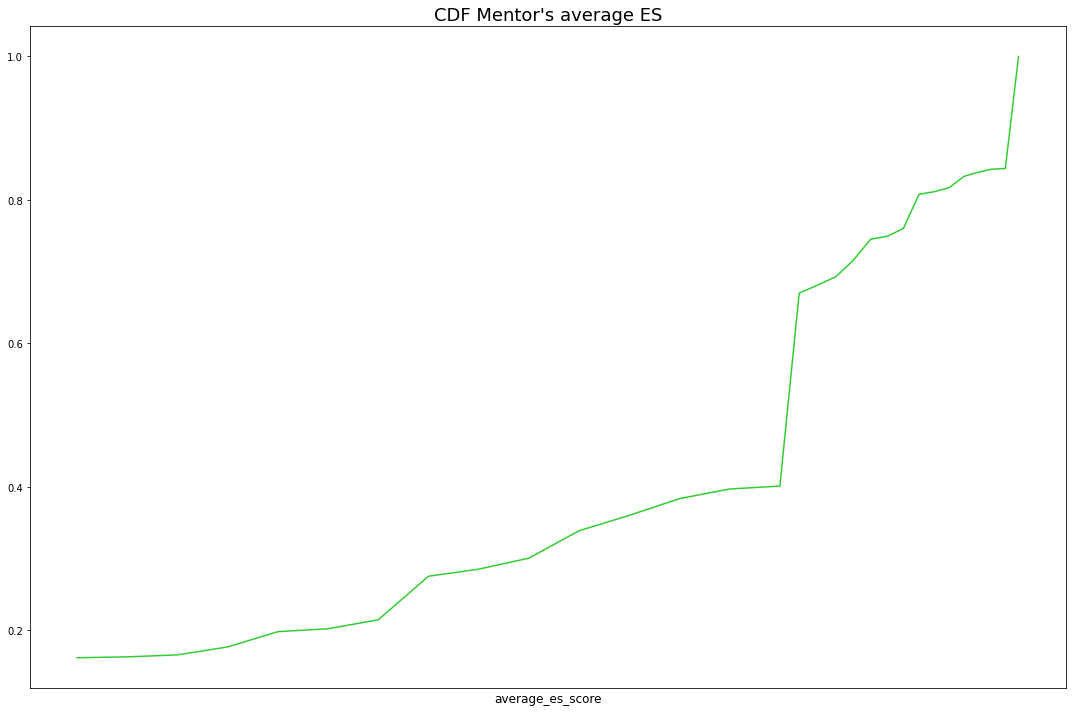

In [41]:
np_result1 = np.array(result1_df['average_es_score'].tolist())
draw_cdf(np_result1, 30, 'average_es_score', "CDF Mentor\'s average ES", 'limegreen')

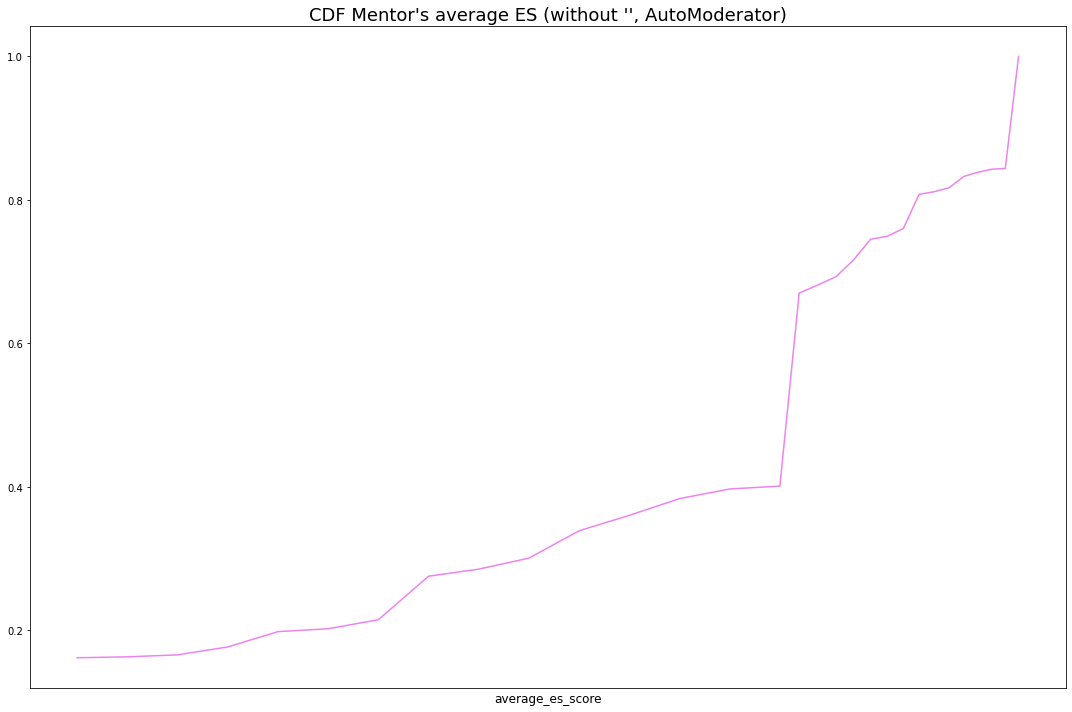

In [42]:
np_result2 = np.array(result2_df['average_es_score'].tolist())
draw_cdf(np_result2, 30, 'average_es_score', "CDF Mentor's average ES (without '', AutoModerator)", 'violet')

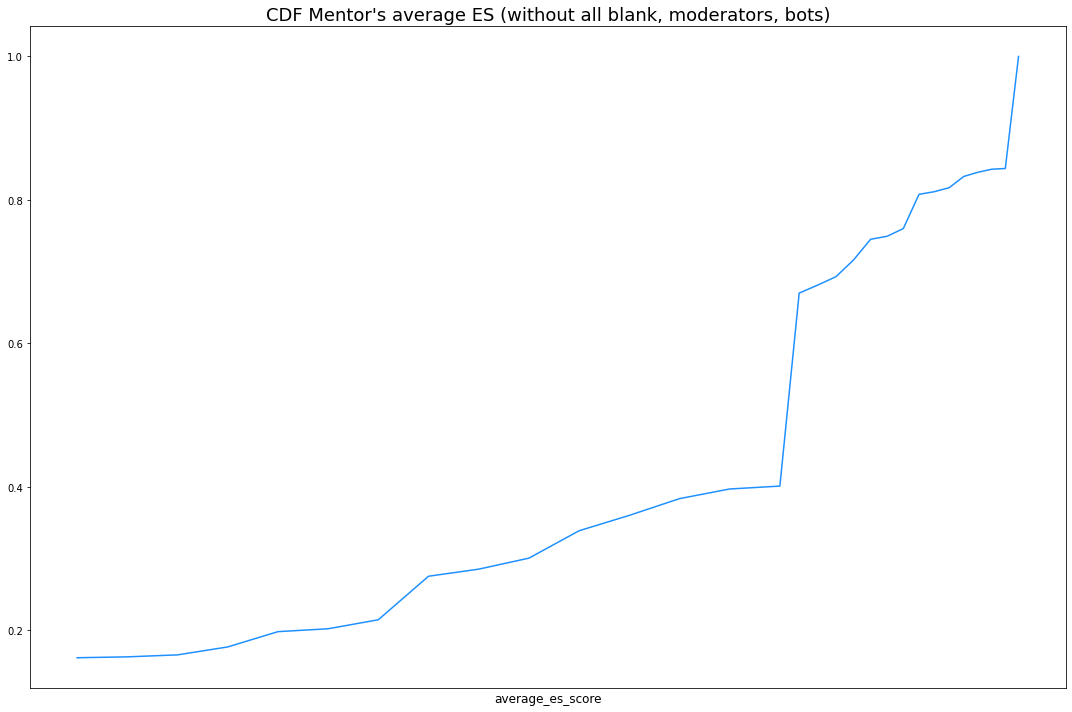

In [43]:
np_result3 = np.array(result3_df['average_es_score'].tolist())
draw_cdf(np_result3, 30, 'average_es_score', "CDF Mentor's average ES (without all blank, moderators, bots)", 'dodgerblue')

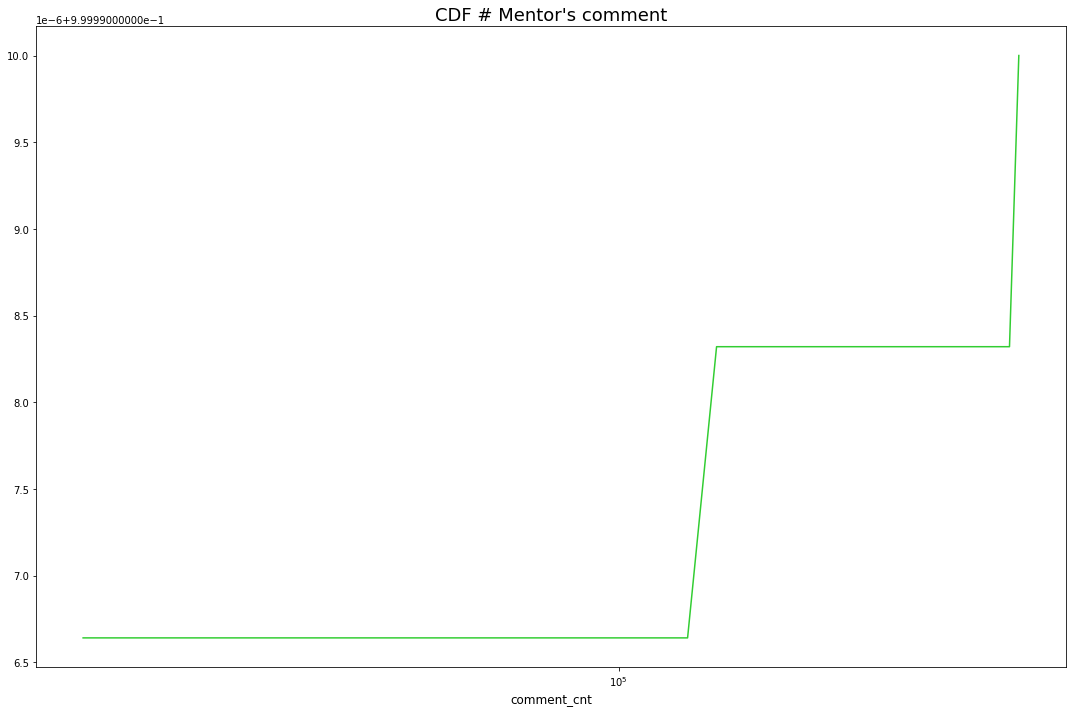

In [44]:
np_result1 = np.array(result1_df['comment_cnt'].tolist())
draw_cdf(np_result1, 30, 'comment_cnt', "CDF # Mentor\'s comment", 'limegreen')

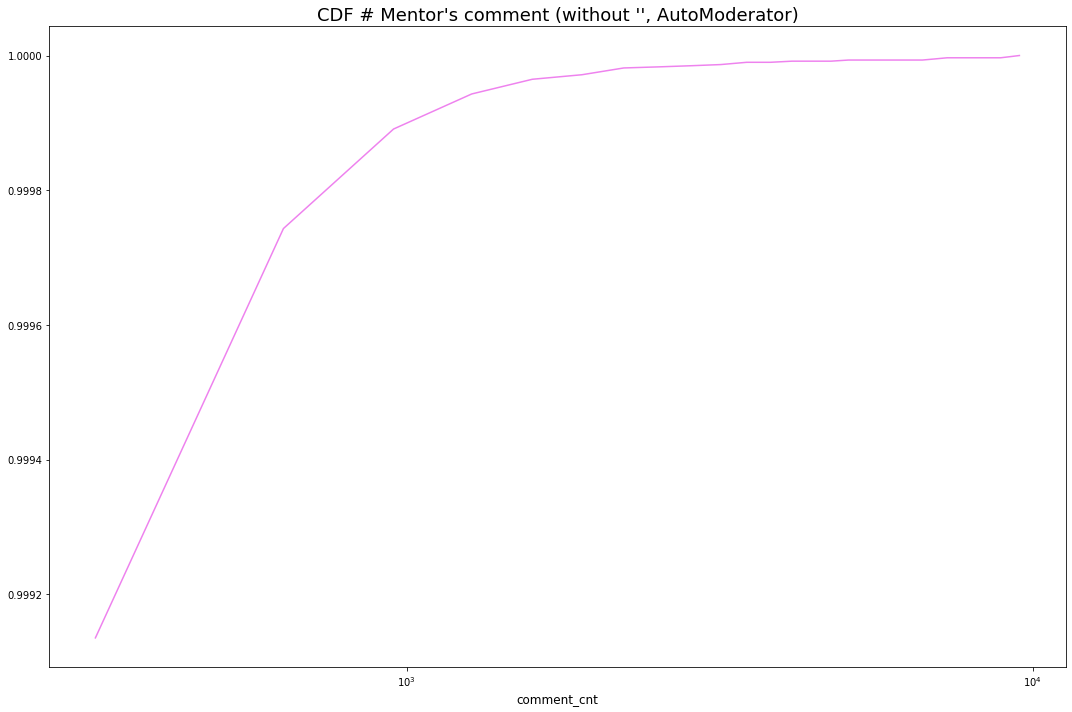

In [45]:
np_result2 = np.array(result2_df['comment_cnt'].tolist())
draw_cdf(np_result2, 30, 'comment_cnt', "CDF # Mentor\'s comment (without '', AutoModerator)", 'violet')

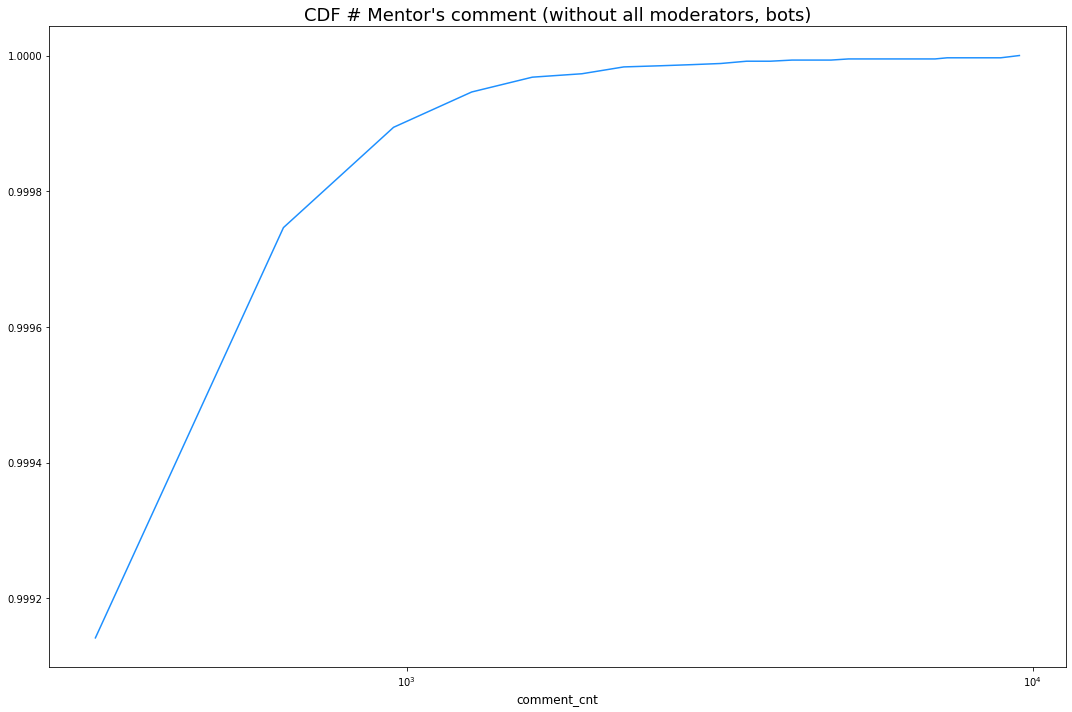

In [46]:
np_result3 = np.array(result3_df['comment_cnt'].tolist())
draw_cdf(np_result3, 30, 'comment_cnt', "CDF # Mentor\'s comment (without all moderators, bots)", 'dodgerblue')

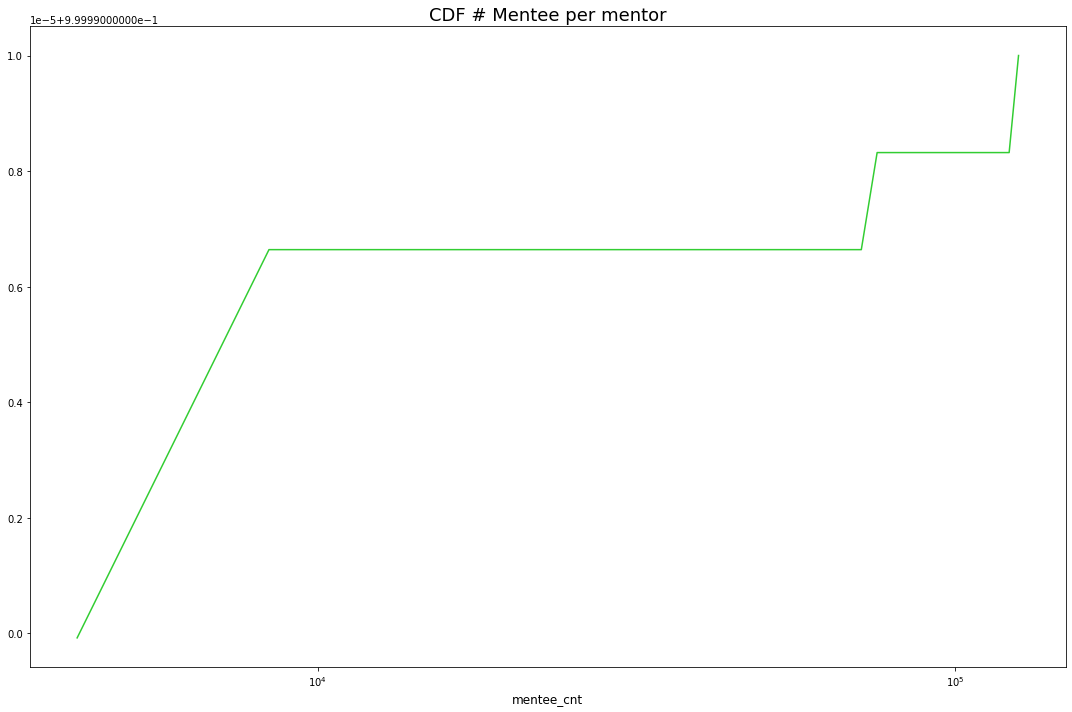

In [47]:
np_result1 = np.array(result1_df['mentee_cnt'].tolist())
draw_cdf(np_result1, 30, 'mentee_cnt', "CDF # Mentee per mentor", 'limegreen')

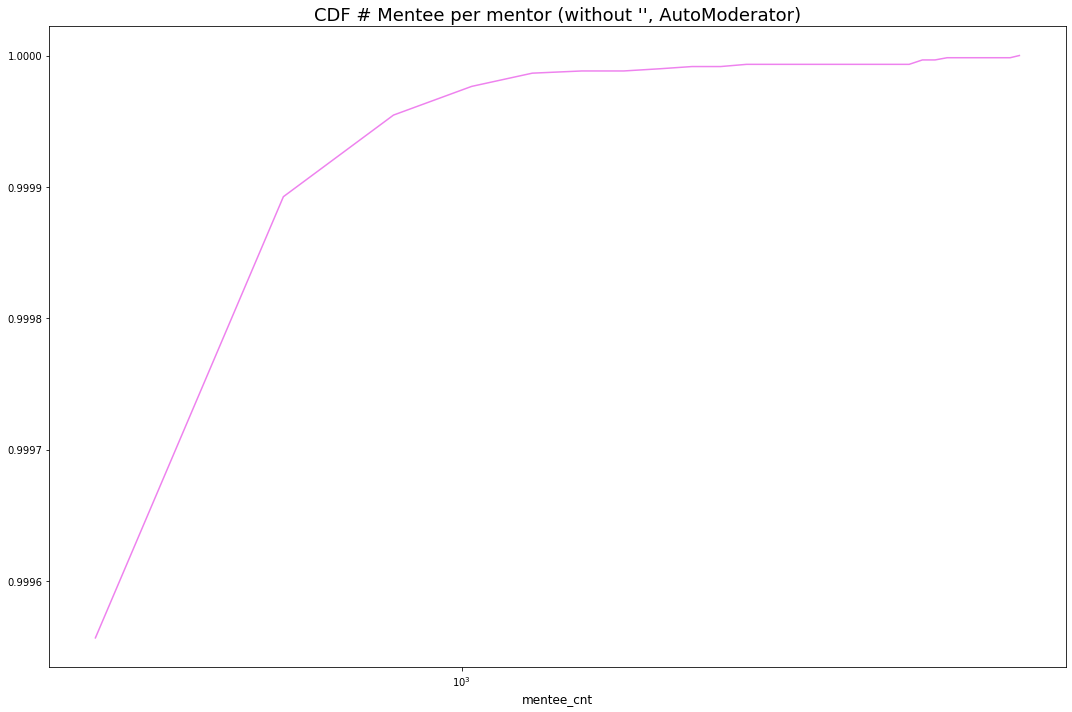

In [48]:
np_result2 = np.array(result2_df['mentee_cnt'].tolist())
draw_cdf(np_result2, 30, 'mentee_cnt', "CDF # Mentee per mentor (without '', AutoModerator)", 'violet')

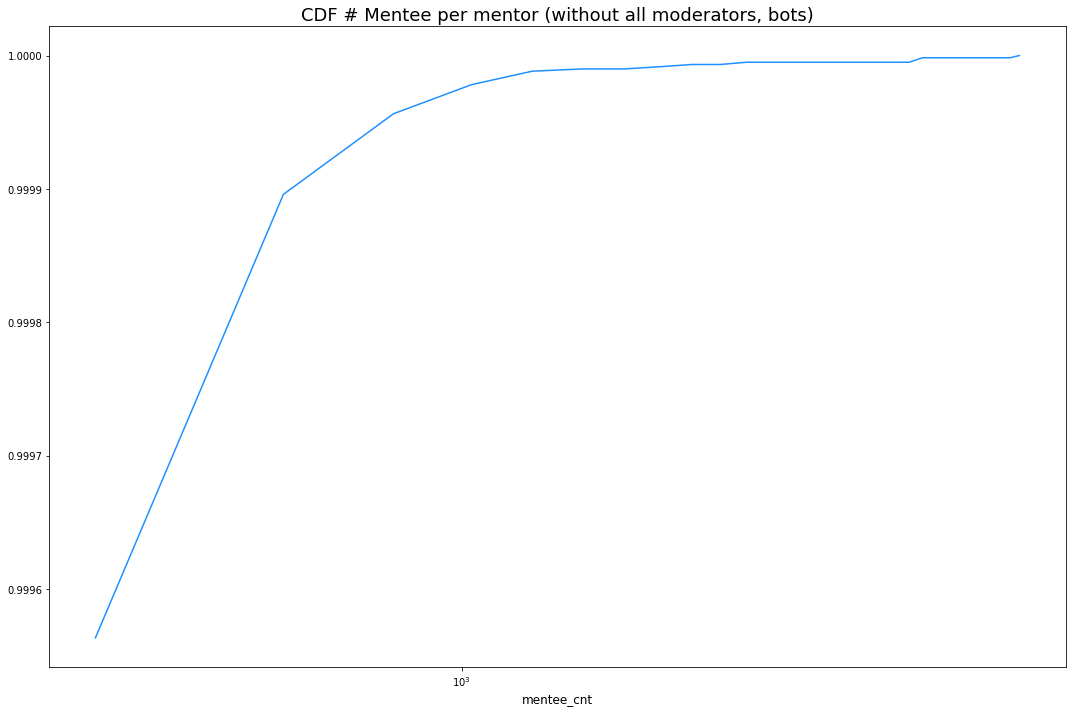

In [49]:
np_result3 = np.array(result3_df['mentee_cnt'].tolist())
draw_cdf(np_result3, 30, 'mentee_cnt', "CDF # Mentee per mentor (without all moderators, bots)", 'dodgerblue')